___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/python/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


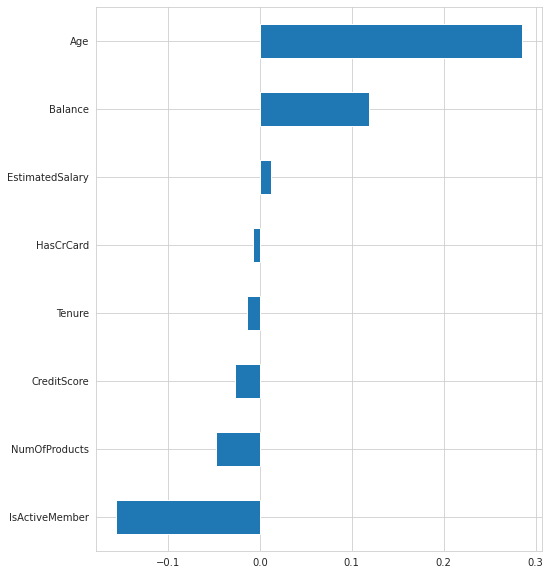

In [ ]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");#.drop("price").plot(kind = "barh");

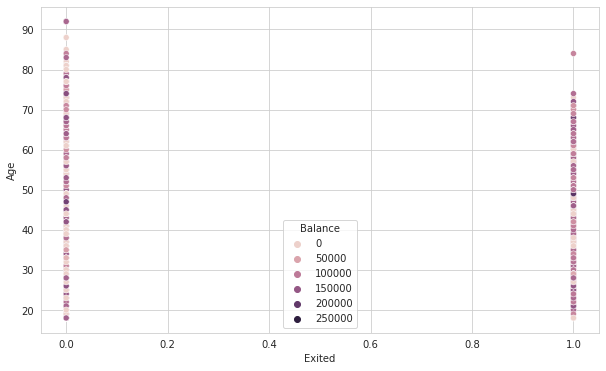

In [ ]:
sns.scatterplot(x = 'Exited',y = 'Age', data = df, hue = "Balance");

In [ ]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [ ]:
for col in df:
    print(f"{col:<30}:", df[col].nunique())

CreditScore                   : 460
Geography                     : 3
Gender                        : 2
Age                           : 70
Tenure                        : 11
Balance                       : 6382
NumOfProducts                 : 4
HasCrCard                     : 2
IsActiveMember                : 2
EstimatedSalary               : 9999
Exited                        : 2


In [ ]:
df.groupby(['Gender','Exited']).count()["IsActiveMember"]

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: IsActiveMember, dtype: int64

In [ ]:
df.groupby(['Geography','Exited']).count()["IsActiveMember"]

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: IsActiveMember, dtype: int64

In [ ]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

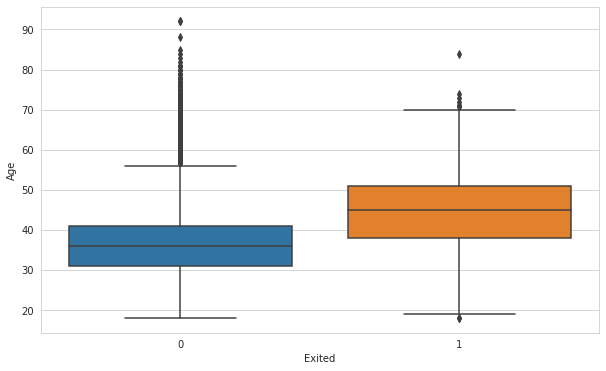

In [ ]:
sns.boxplot(x = 'Exited',y = 'Age', data = df);

In [ ]:
df.shape

(10000, 12)

# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [ ]:
seed = 101

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [ ]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
cat_onehot =['Geography', 'Gender']

In [ ]:
X_train[cat_onehot].head()

,Geography,Gender
6572,France,Female
2271,Germany,Male
6914,France,Male
6937,France,Female
1058,Germany,Male


In [ ]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

enc.fit_transform(X_train[cat_onehot])

array([[1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

In [ ]:
enc.get_feature_names_out(cat_onehot)

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [ ]:
X_train_onehot = pd.DataFrame(enc.fit_transform(X_train[cat_onehot]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat_onehot))
X_train_onehot

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6572,1.000,0.000,0.000,1.000,0.000
2271,0.000,1.000,0.000,0.000,1.000
6914,1.000,0.000,0.000,0.000,1.000
6937,1.000,0.000,0.000,1.000,0.000
1058,0.000,1.000,0.000,0.000,1.000
...,...,...,...,...,...
599,0.000,1.000,0.000,1.000,0.000
5695,1.000,0.000,0.000,0.000,1.000
8006,0.000,1.000,0.000,0.000,1.000
1361,1.000,0.000,0.000,0.000,1.000


In [ ]:
X_train_numeric = X_train.select_dtypes("number")
X_train_numeric.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6572,588,21,8,0.000,2,1,1,110114.190
2271,665,25,5,153611.830,2,1,0,35321.650
6914,702,40,7,145536.900,1,0,1,135334.240
6937,589,50,4,0.000,2,0,1,182076.970
1058,640,33,8,81677.220,2,0,0,34925.560


In [ ]:
X_train_new = X_train_numeric.join([X_train_onehot])
X_train_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6572,588,21,8,0.000,2,1,1,110114.190,1.000,0.000,0.000,1.000,0.000
2271,665,25,5,153611.830,2,1,0,35321.650,0.000,1.000,0.000,0.000,1.000
6914,702,40,7,145536.900,1,0,1,135334.240,1.000,0.000,0.000,0.000,1.000
6937,589,50,4,0.000,2,0,1,182076.970,1.000,0.000,0.000,1.000,0.000
1058,640,33,8,81677.220,2,0,0,34925.560,0.000,1.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,484,34,4,148249.540,1,0,1,33738.270,0.000,1.000,0.000,1.000,0.000
5695,787,46,7,117685.310,2,1,1,93360.350,1.000,0.000,0.000,0.000,1.000
8006,716,41,8,126145.540,2,1,1,138051.190,0.000,1.000,0.000,0.000,1.000
1361,578,32,4,0.000,2,1,1,141822.800,1.000,0.000,0.000,0.000,1.000


In [ ]:
X_test_onehot = pd.DataFrame(enc.transform(X_test[cat_onehot]), index = X_test.index, 
                             columns = enc.get_feature_names_out(cat_onehot))
X_test_onehot

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6676,0.000,0.000,1.000,0.000,1.000
6421,1.000,0.000,0.000,0.000,1.000
9834,1.000,0.000,0.000,1.000,0.000
8492,1.000,0.000,0.000,0.000,1.000
9982,0.000,1.000,0.000,1.000,0.000
...,...,...,...,...,...
5544,1.000,0.000,0.000,0.000,1.000
1922,1.000,0.000,0.000,0.000,1.000
2877,0.000,0.000,1.000,0.000,1.000
9056,0.000,1.000,0.000,1.000,0.000


In [ ]:
X_test_numeric = X_test.select_dtypes("number")
X_test_numeric.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6676,619,52,8,0.000,2,1,1,123242.110
6421,616,23,8,73112.950,1,1,1,62733.050
9834,516,46,6,62212.290,1,0,1,171681.860
8492,494,28,9,114731.760,2,0,1,79479.740
9982,655,46,7,137145.120,1,1,0,115146.400


In [ ]:
X_test_new = X_test_numeric.join([X_test_onehot])
X_test_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6676,619,52,8,0.000,2,1,1,123242.110,0.000,0.000,1.000,0.000,1.000
6421,616,23,8,73112.950,1,1,1,62733.050,1.000,0.000,0.000,0.000,1.000
9834,516,46,6,62212.290,1,0,1,171681.860,1.000,0.000,0.000,1.000,0.000
8492,494,28,9,114731.760,2,0,1,79479.740,1.000,0.000,0.000,0.000,1.000
9982,655,46,7,137145.120,1,1,0,115146.400,0.000,1.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544,507,42,6,0.000,2,1,0,34777.230,1.000,0.000,0.000,0.000,1.000
1922,625,36,9,108546.160,3,1,0,133807.770,1.000,0.000,0.000,0.000,1.000
2877,657,67,5,119785.470,2,1,1,107534.320,0.000,0.000,1.000,0.000,1.000
9056,765,46,8,119492.880,2,0,1,166896.010,0.000,1.000,0.000,1.000,0.000


In [ ]:
X_train=X_train_new
X_test=X_test_new

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [ ]:
X_train.shape

(9000, 13)

## without class_weigth

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(12, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

### Create The Model

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 12)                168       
                                                                 
 dense_61 (Dense)            (None, 6)                 78        
                                                                 
 dense_62 (Dense)            (None, 3)                 21        
                                                                 
 dense_63 (Dense)            (None, 1)                 4         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'dense_60/kernel:0' shape=(13, 12) dtype=float32, numpy=
 array([[-0.0259431 , -0.2308774 , -0.47706738, -0.2579372 , -0.00354013,
          0.2789193 ,  0.4753609 ,  0.20169613, -0.11838505, -0.27425218,
          0.20941958,  0.3726239 ],
        [ 0.35269454, -0.10098302, -0.04182041, -0.20664439,  0.39845172,
          0.12522832,  0.08511201, -0.38247463, -0.09031013,  0.33848104,
          0.45462933, -0.3087522 ],
        [-0.11325341,  0.06501654,  0.23443618,  0.38230023, -0.4651392 ,
          0.10173908,  0.41285977,  0.0585722 ,  0.150372  ,  0.0652155 ,
          0.48313263,  0.27258846],
        [-0.31053025,  0.04220256, -0.4828664 ,  0.23314545, -0.44797033,
         -0.12216228, -0.13015637,  0.3969548 ,  0.12528166,  0.46930584,
         -0.2505429 ,  0.31153908],
        [ 0.3099408 , -0.04930347, -0.2363773 , -0.26780617, -0.03450716,
         -0.3841575 ,  0.06803128,  0.01400474, -0.08326656,  0.06512204,
          0.02313265, -0.34497586],
        [

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 256, epochs = 300)

Epoch 1/300
30/30 [==============================] - 1s 7ms/step - loss: 0.1825 - val_loss: 0.1638
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1650 - val_loss: 0.1565
Epoch 3/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1600 - val_loss: 0.1532
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1573 - val_loss: 0.1507
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1552 - val_loss: 0.1492
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1536 - val_loss: 0.1483
Epoch 7/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1521 - val_loss: 0.1464
Epoch 8/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1509 - val_loss: 0.1456
Epoch 9/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1494 - val_loss: 0.1440
Epoch 10/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1483 - val_loss: 0.1424
Epoch 11/

In [ ]:
model.weights

[<tf.Variable 'dense_60/kernel:0' shape=(13, 12) dtype=float32, numpy=
 array([[-0.0259431 , -0.2103643 , -0.19065075, -0.41830567,  0.01049223,
          0.00384622,  0.4185585 ,  0.09295388, -0.15507041, -0.09764962,
          0.11036455,  0.33588672],
        [ 0.35269454, -0.33424088, -0.07290826,  0.7125    ,  0.37999302,
         -0.02417105, -0.20350017, -1.3210965 , -0.17377977,  0.89379025,
          0.5161275 ,  0.05358643],
        [-0.11325341,  0.01183397,  0.26855677,  0.36939135, -0.19009292,
          0.05720685,  0.3826721 ,  0.01925582,  0.13018672,  0.22044861,
          0.25197157, -0.00599799],
        [-0.31053025, -0.01678995, -0.3699934 ,  0.28713754, -0.19492647,
         -0.40844467, -0.03994614,  0.07033334,  0.47730535,  0.14376684,
         -0.47550026,  0.11314492],
        [ 0.3099408 , -0.39602154, -0.33586863, -0.72229713,  0.6649382 ,
         -2.0353496 ,  0.6721623 , -0.02866466,  0.30358174, -0.28022784,
         -0.33889315, -1.2302604 ],
        [

In [ ]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.183,0.164
1,0.165,0.157
2,0.160,0.153
3,0.157,0.151
4,0.155,0.149
...,...,...
295,0.102,0.105
296,0.101,0.104
297,0.101,0.104
298,0.102,0.104


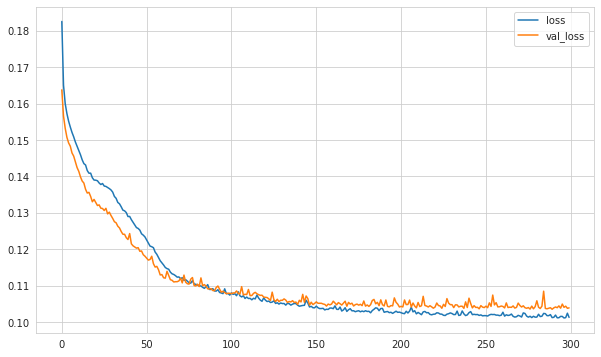

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

0.10606316477060318

In [ ]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.3629036443810354 
mae: 0.20188972350209952 
mse: 0.10606316418708962 
rmse: 0.32567340110467974


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(12, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.0005) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

### Create The Model

In [ ]:
model.weights

[<tf.Variable 'dense_85/kernel:0' shape=(13, 12) dtype=float32, numpy=
 array([[-0.0259431 , -0.2308774 , -0.47706738, -0.2579372 , -0.00354013,
          0.2789193 ,  0.4753609 ,  0.20169613, -0.11838505, -0.27425218,
          0.20941958,  0.3726239 ],
        [ 0.35269454, -0.10098302, -0.04182041, -0.20664439,  0.39845172,
          0.12522832,  0.08511201, -0.38247463, -0.09031013,  0.33848104,
          0.45462933, -0.3087522 ],
        [-0.11325341,  0.06501654,  0.23443618,  0.38230023, -0.4651392 ,
          0.10173908,  0.41285977,  0.0585722 ,  0.150372  ,  0.0652155 ,
          0.48313263,  0.27258846],
        [-0.31053025,  0.04220256, -0.4828664 ,  0.23314545, -0.44797033,
         -0.12216228, -0.13015637,  0.3969548 ,  0.12528166,  0.46930584,
         -0.2505429 ,  0.31153908],
        [ 0.3099408 , -0.04930347, -0.2363773 , -0.26780617, -0.03450716,
         -0.3841575 ,  0.06803128,  0.01400474, -0.08326656,  0.06512204,
          0.02313265, -0.34497586],
        [

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 256, epochs = 300)

Epoch 1/300
30/30 [==============================] - 1s 8ms/step - loss: 0.1883 - val_loss: 0.1724
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1727 - val_loss: 0.1632
Epoch 3/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1659 - val_loss: 0.1589
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1626 - val_loss: 0.1561
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1602 - val_loss: 0.1542
Epoch 6/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1585 - val_loss: 0.1528
Epoch 7/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1572 - val_loss: 0.1514
Epoch 8/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1560 - val_loss: 0.1506
Epoch 9/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1550 - val_loss: 0.1499
Epoch 10/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1541 - val_loss: 0.1486
Epoch 11/

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

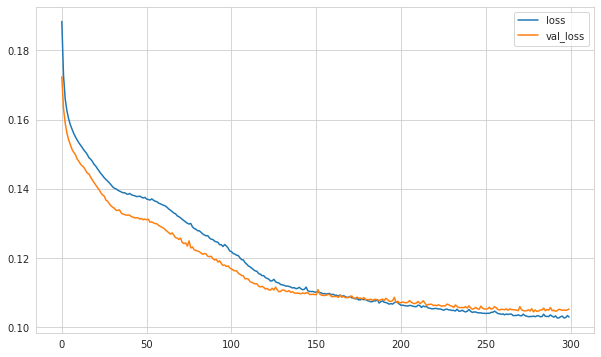

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.3580668634531702 
mae: 0.20407078169286252 
mse: 0.1068683866391797 
rmse: 0.32690730588223277


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(12, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 256, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
30/30 [==============================] - 1s 8ms/step - loss: 0.1730 - val_loss: 0.1564
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1574 - val_loss: 0.1494
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1529 - val_loss: 0.1462
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1499 - val_loss: 0.1429
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1471 - val_loss: 0.1401
Epoch 6/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.1441 - val_loss: 0.1369
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1420 - val_loss: 0.1349
Epoch 8/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.1399 - val_loss: 0.1337
Epoch 9/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1384 - val_loss: 0.1305
Epoch 10/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1368 - val_loss: 0.1299

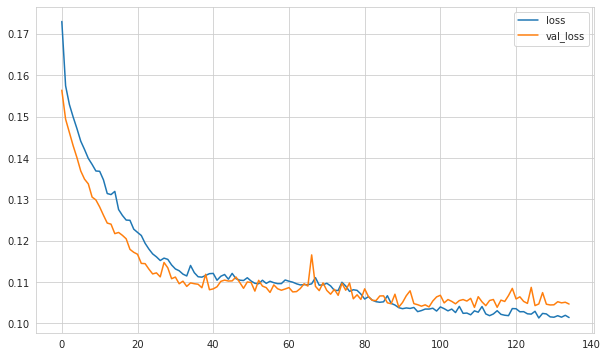

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.38324363430319186 
mae: 0.21493807814642787 
mse: 0.10267698300483895 
rmse: 0.32043249367821447


### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(12, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 256, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
30/30 [==============================] - 1s 8ms/step - loss: 0.2817 - val_loss: 0.1568
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1702 - val_loss: 0.1524
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1627 - val_loss: 0.1514
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1610 - val_loss: 0.1516
Epoch 5/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.1608 - val_loss: 0.1510
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1602 - val_loss: 0.1505
Epoch 7/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.1599 - val_loss: 0.1505
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1588 - val_loss: 0.1499
Epoch 9/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.1589 - val_loss: 0.1486
Epoch 10/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.1584 - val_loss: 0.1489

### Add Early Stop

#### Monitor the "val_loss" as metric

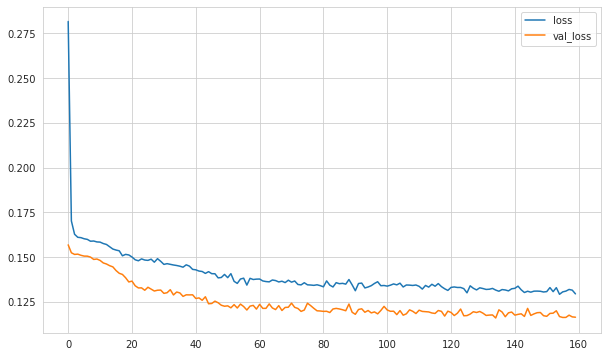

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Monitor the "val_recall" as metric

In [ ]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.30610830469931893 
mae: 0.25596495367586614 
mse: 0.11551839554196212 
rmse: 0.33987997225779887


## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___